# Solving differential equations with Euler's method(s)

_(Jupyter notebook by Simone Brugiapaglia)_

In this notebook we will illustrate two numerical methods for ordinary differential equations: forward and backward Euler's method.

For more details, see Chapter 22 of 

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

and Sections 5.1, 5.2 and 5.11 of

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Forward Euler's method

Given an Initial Value Problem (IVP) of the form
\begin{align*}
& y'(t) = f(t,y(t)), \quad a \leq t \leq b,\\
& y(a) =\alpha,
\end{align*}
we seek an approximation of the solution $y(t)$ on a grid $a=t_0 < t_1 < \cdots < t_N =b$, where $t_i = a + hi$, for $i=0,\ldots, N$. Namely, we want to compute a sequence $(w_i)_{i=0}^N$ such that $w_i \approx y(t_i)$. For this purpose, we consider *forward Euler's method*, defined as follows:
\begin{align*}
& w_{i+1} = w_i + h f(t_i, w_i), \quad i = 0,\ldots, N-1,\\
& w_0 =\alpha.
\end{align*}
We start by implementing the method in Python.

In [2]:
def fwd_Euler(f,alpha,a,b,h):
    '''
    Implements forward Euler's method. 
    '''   
    N = int(np.round((b-a)/h)) # number of points
    t = np.linspace(a,b,N+1).reshape((N+1,1)) # time grid
    w = np.zeros((N+1,1))    # initialize w array
    w[0] = alpha             # initial condition
    for i in range(N):
        w[i+1] = w[i] + h * f(t[i], w[i]) # forward Euler step

    return t, w 

## A model problem

We test the method on the following model IVP:
\begin{align*}
& y'(t) = \mu \cdot y(t), \quad a \leq t \leq b,\\
& y(a) =\alpha,
\end{align*}
where $\mu \in \mathbb{R}$ and whose exact solution is $y(t) = \alpha \cdot e^{\mu (t - a)}$.

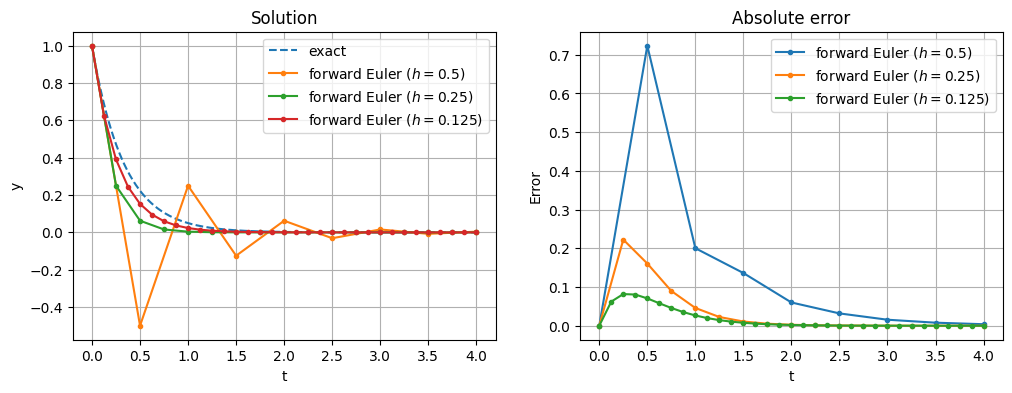

In [3]:
# Set IVP parameters
mu = -3
alpha = 1
a = 0
b = 4
f = lambda t,y: mu * y

# exact IVP solution
y_exact = lambda t: alpha * np.exp(mu * (t-a)) 

## Run forward Euler for different values of h
plt.figure(figsize = (12,4))

plt.subplot(121)
t_grid = np.linspace(a,b,1000)
plt.plot(t_grid, y_exact(t_grid), '--', label = 'exact')

for h in (0.5, 0.25, 0.125):
    t, w = fwd_Euler(f,alpha,a,b,h)
    plt.subplot(121)
    plt.plot(t, w, '.-', label = 'forward Euler ($h = '+str(h)+')$') # plot solution

    plt.subplot(122)
    plt.plot(t, np.abs(w-y_exact(t)),'.-', label = 'forward Euler ($h = '+str(h)+')$') # plot absolute error

plt.subplot(121)
plt.legend()
plt.grid()
plt.title('Solution')
plt.xlabel('t')
plt.ylabel('y')

plt.subplot(122)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Absolute error')

plt.show()

For large step size ($h = 0.5$) the approximation is quite poor. However, the numerical approximations of the solution $y(t)$ get more and more accurate as $h \to 0$. 

To investigate the accuracy of Euler method in more detail, we show a convergence plot of the maximum absolute error $\max_{i=0,\ldots,N}|w_i - y(t_i)|$ 
as a function of $h$.

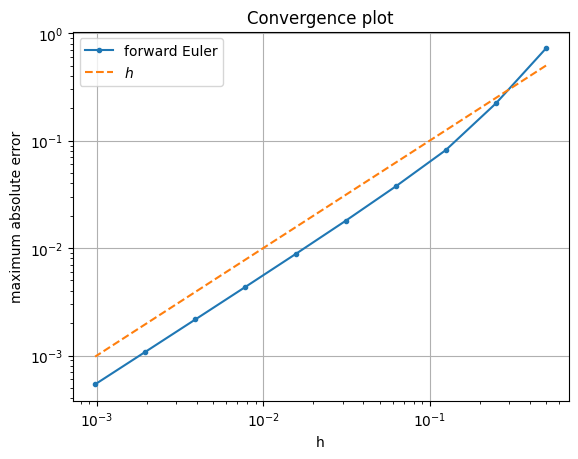

In [4]:
# set h values and initialize array of errors
h_vals = 2.0**(-(np.arange(10)+1))
Err_vals = np.array([], dtype=np.int64).reshape(0,1)

# apply forward Euler for different values of h
for h in h_vals:
    t, w = fwd_Euler(f,alpha,a,b,h)
    Err_vals = np.vstack((Err_vals, np.max(np.abs(w-y_exact(t)))))

# visualize convergence plot
plt.loglog(h_vals, Err_vals, '.-', label = 'forward Euler')
plt.loglog(h_vals, h_vals, '--', label = '$h$')
plt.grid()
plt.xlabel('h')
plt.ylabel('maximum absolute error')
plt.legend()
plt.title('Convergence plot')

plt.show()

As predicted by the theory, the error of forward Euler's method has order $O(h)$ for $h \to 0$.

## Backward Euler's method

An alternative to forward Euler's method is *backward Euler's method*, defined by 
\begin{align*}
& w_{i+1} = w_i + h f(t_{i+1}, w_{i+1}), \quad i = 0,\ldots, N-1,\\
& w_0 =\alpha.
\end{align*}
Now, $w_{i+1}$ is defined via an implict (in general, nonlinear) equation that will have to be solved with a suitable root-finding method such as Netwon's method. Here, for simplicity we only implement backward Euler's method for the model IVP problem. In that case, the the implicit equation defining $w_{i+1}$ becomes
$$
w_{i+1} = w_i + h \mu w_{i+1}, \quad i = 0,\ldots, N-1,
$$
which can be explicitly solved as
$$
w_{i+1} = w_i/(1-h\mu) , \quad i = 0,\ldots, N-1.
$$

In [5]:
def bwd_Euler_model_IVP(mu,alpha,a,b,h):
    '''
    Implements backward Euler's method. 
    '''
    N = int(np.round((b-a)/h)) # number of points
    t = np.linspace(a,b,N+1).reshape((N+1,1)) # time grid
    w = np.zeros((N+1,1))    # initialize w array
    w[0] = alpha             # initial condition
    for i in range(N):
        w[i+1] = w[i] / (1- h * mu)

    return t, w

We now test backward Euler's method on the model IVP for different values of $h$.

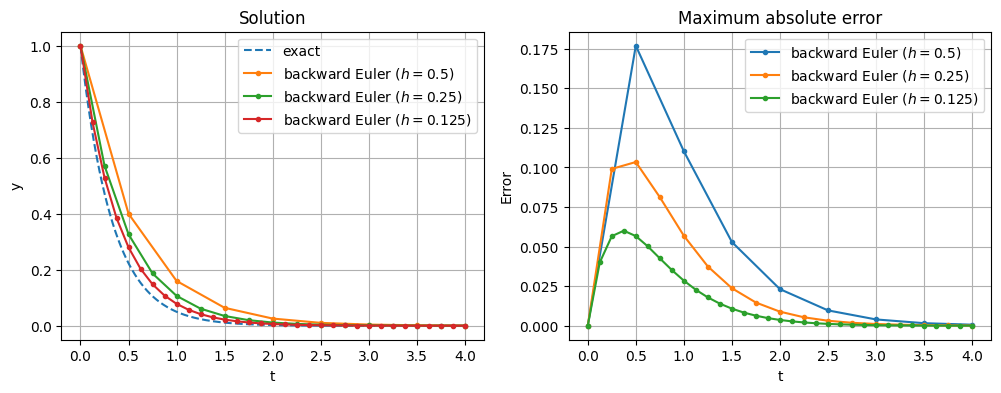

In [6]:
plt.figure(figsize = (12,4))

plt.subplot(121)
plt.plot(t_grid, y_exact(t_grid), '--', label = 'exact')

for h in (0.5, 0.25, 0.125):
    t, w = bwd_Euler_model_IVP(mu,alpha,a,b,h)
    plt.subplot(121)
    plt.plot(t, w, '.-', label = 'backward Euler ($h = '+str(h)+')$')

    plt.subplot(122)
    plt.plot(t, np.abs(w-y_exact(t)),'.-', label = 'backward Euler ($h = '+str(h)+')$')

plt.subplot(121)
plt.legend()
plt.grid()
plt.title('Solution')
plt.xlabel('t')
plt.ylabel('y')

plt.subplot(122)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Maximum absolute error')

plt.show()

The large oscillations present in forward Euler's approximations for $h$ large disappeared. This is due to the better stability properties of the backward variant of the method. 

## Forward vs. backward Euler

We conclude by comparing the convergence plots of forward and backward Euler.

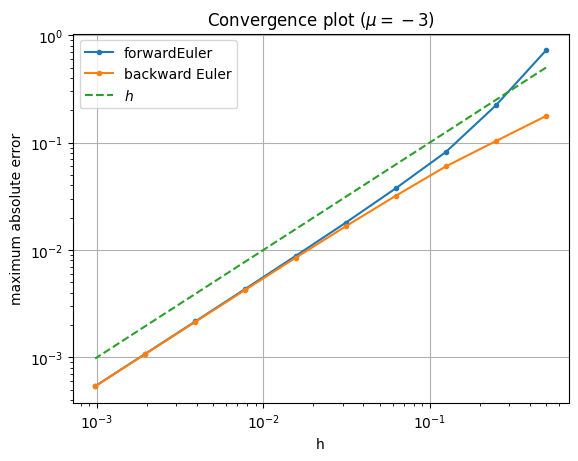

In [7]:
Err_vals_bwd = np.array([], dtype=np.int64).reshape(0,1)

for h in h_vals:
    t, w = bwd_Euler_model_IVP(mu,alpha,a,b,h)
    Err_vals_bwd = np.vstack((Err_vals_bwd, np.max(np.abs(w-y_exact(t)))))

# visualize convergence plot
plt.loglog(h_vals, Err_vals, '.-', label = 'forwardEuler')
plt.loglog(h_vals, Err_vals_bwd, '.-', label = 'backward Euler')
plt.loglog(h_vals, h_vals, '--', label = '$h$')
plt.grid()
plt.xlabel('h')
plt.ylabel('maximum absolute error')
plt.legend()
plt.title('Convergence plot ($\mu ='+str(mu)+'$)')

plt.show()

For large values of $h$, the convergence plot confirms that backward Euler is more accurate. For $h\to 0$, the two methods essentially have the same accuracy.

## Recommended problems

1. Rerun the tests in this notebook with $\mu = 3$ instead of $\mu = -3$. What do you observe?
2. Test the forward Euler's method on other IVP problems for which an exact solution is known. For example, see Exercises 6 and 8 in Section 5.2 of
   *Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

3. Implement backward Euler's method for a generic $f$, combining it with Newton's method to solve the implicit equation defining $w_{i+1}$.